In [164]:
# Basic Imports 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import pandas as pd

# Import Models
from sklearn.mixture import GaussianMixture
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch

# Metrics for the Verification of Results
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Import Audio Feature Extraction from the audio 
import librosa
import librosa.display


# For the IO operations 
import os

import warnings
warnings.filterwarnings("ignore")

# Feature Extraction

In [455]:
input_directory  = "/Users/syakka/Desktop/all-samples/"
instruments = ["flute","violin","cello","banjo","clarinet","guitar","saxophone","trumpet"]
list_of_files = []
Y = []
features = []

In [315]:
def get_feature(file):
    feature = np.array([])
    y,sr = librosa.load(file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y,sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)

    ## Add the Medain Values of the features 
    feature = np.append(feature,np.median(mfcc,1))
    feature = np.append(feature,np.median(spectral_centroid))
    feature = np.append(feature,np.median(spectral_bandwidth))
    feature = np.append(feature,np.median(spectral_contrast))
    feature = np.append(feature,np.median(spectral_rolloff))
    return feature

In [316]:
def get_feature_with_offset(file, offset):
    feature = np.array([])
    y,sr = librosa.load(file, offset=offset, duration=1.0)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y,sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)

    ## Add the Medain Values of the features 
    feature = np.append(feature,np.median(mfcc,1))
    feature = np.append(feature,np.median(spectral_centroid))
    feature = np.append(feature,np.median(spectral_bandwidth))
    feature = np.append(feature,np.median(spectral_contrast))
    feature = np.append(feature,np.median(spectral_rolloff))
    return feature

In [317]:
file_number = 0
for root, directories, files in os.walk(input_directory):
    for file in files:
        for instrument in instruments:
             if instrument in file: 
                    # complete file 
                    file_number = file_number+1;
                    complete_file = os.path.join(root, file)
                    print("Processing ",file_number, complete_file)
                    feature = get_feature(complete_file)
                    features.append(feature)
                    list_of_files.append(complete_file)
                    Y.append(instrument)

Processing  1 /Users/syakka/Desktop/all-samples/cello/cello_F2_phrase_mezzo-forte_arco-detache.mp3
Processing  2 /Users/syakka/Desktop/all-samples/cello/cello_As2_05_forte_arco-normal.mp3
Processing  3 /Users/syakka/Desktop/all-samples/cello/cello_F5_15_fortissimo_arco-normal.mp3
Processing  4 /Users/syakka/Desktop/all-samples/cello/cello_D5_025_pianissimo_arco-normal.mp3
Processing  5 /Users/syakka/Desktop/all-samples/cello/cello_C3_1_fortissimo_arco-normal.mp3
Processing  6 /Users/syakka/Desktop/all-samples/cello/cello_As3_1_mezzo-piano_arco-normal.mp3
Processing  7 /Users/syakka/Desktop/all-samples/cello/cello_As2_1_forte_arco-normal.mp3
Processing  8 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_mezzo-piano_arco-normal.mp3
Processing  9 /Users/syakka/Desktop/all-samples/cello/cello_Gs5_025_mezzo-piano_arco-normal.mp3
Processing  10 /Users/syakka/Desktop/all-samples/cello/cello_F3_05_forte_arco-normal.mp3
Processing  11 /Users/syakka/Desktop/all-samples/cello/cello_B5_15_mezzo

Processing  90 /Users/syakka/Desktop/all-samples/cello/cello_D5_025_fortissimo_arco-normal.mp3
Processing  91 /Users/syakka/Desktop/all-samples/cello/cello_A4_025_mezzo-piano_arco-normal.mp3
Processing  92 /Users/syakka/Desktop/all-samples/cello/cello_C6_05_forte_arco-normal.mp3
Processing  93 /Users/syakka/Desktop/all-samples/cello/cello_G5_05_fortissimo_arco-normal.mp3
Processing  94 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_025_pianissimo_arco-normal.mp3
Processing  95 /Users/syakka/Desktop/all-samples/cello/cello_B2_025_forte_arco-normal.mp3
Processing  96 /Users/syakka/Desktop/all-samples/cello/cello_F2_15_piano_arco-normal.mp3
Processing  97 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_1_forte_arco-normal.mp3
Processing  98 /Users/syakka/Desktop/all-samples/cello/cello_G3_15_mezzo-piano_arco-normal.mp3
Processing  99 /Users/syakka/Desktop/all-samples/cello/cello_F4_1_fortissimo_arco-normal.mp3
Processing  100 /Users/syakka/Desktop/all-samples/cello/cello_Cs4_05_forte

Processing  177 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_1_mezzo-piano_arco-normal.mp3
Processing  178 /Users/syakka/Desktop/all-samples/cello/cello_C5_05_mezzo-piano_arco-normal.mp3
Processing  179 /Users/syakka/Desktop/all-samples/cello/cello_G2_1_forte_arco-normal.mp3
Processing  180 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_fortissimo_arco-normal.mp3
Processing  181 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_mezzo-forte_arco-col-legno-tratto.mp3
Processing  182 /Users/syakka/Desktop/all-samples/cello/cello_Ds5_15_forte_arco-normal.mp3
Processing  183 /Users/syakka/Desktop/all-samples/cello/cello_G3_15_fortissimo_arco-normal.mp3
Processing  184 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_05_pianissimo_arco-normal.mp3
Processing  185 /Users/syakka/Desktop/all-samples/cello/cello_C3_1_mezzo-piano_arco-major-trill.mp3
Processing  186 /Users/syakka/Desktop/all-samples/cello/cello_As3_15_fortissimo_arco-normal.mp3
Processing  187 /Users/syakka/Deskto

Processing  265 /Users/syakka/Desktop/all-samples/cello/cello_G5_15_fortissimo_arco-normal.mp3
Processing  266 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_1_pianissimo_arco-normal.mp3
Processing  267 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_025_pianissimo_arco-normal.mp3
Processing  268 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_05_pianissimo_arco-normal.mp3
Processing  269 /Users/syakka/Desktop/all-samples/cello/cello_As5_15_fortissimo_arco-normal.mp3
Processing  270 /Users/syakka/Desktop/all-samples/cello/cello_A2_025_fortissimo_arco-normal.mp3
Processing  271 /Users/syakka/Desktop/all-samples/cello/cello_F4_025_forte_arco-normal.mp3
Processing  272 /Users/syakka/Desktop/all-samples/cello/cello_G2_phrase_mezzo-forte_arco-spiccato.mp3
Processing  273 /Users/syakka/Desktop/all-samples/cello/cello_F3_1_mezzo-piano_arco-normal.mp3
Processing  274 /Users/syakka/Desktop/all-samples/cello/cello_A2_1_pianissimo_arco-normal.mp3
Processing  275 /Users/syakka/Desktop/all-s

Processing  351 /Users/syakka/Desktop/all-samples/cello/cello_G3_phrase_mezzo-forte_arco-staccato.mp3
Processing  352 /Users/syakka/Desktop/all-samples/cello/cello_G3_05_fortissimo_arco-normal.mp3
Processing  353 /Users/syakka/Desktop/all-samples/cello/cello_G5_025_pianissimo_arco-normal.mp3
Processing  354 /Users/syakka/Desktop/all-samples/cello/cello_Gs5_1_fortissimo_arco-normal.mp3
Processing  355 /Users/syakka/Desktop/all-samples/cello/cello_C6_05_fortissimo_arco-normal.mp3
Processing  356 /Users/syakka/Desktop/all-samples/cello/cello_B3_025_fortissimo_arco-normal.mp3
Processing  357 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_forte_arco-normal.mp3
Processing  358 /Users/syakka/Desktop/all-samples/cello/cello_D4_1_forte_arco-normal.mp3
Processing  359 /Users/syakka/Desktop/all-samples/cello/cello_G2_1_mezzo-piano_molto-vibrato.mp3
Processing  360 /Users/syakka/Desktop/all-samples/cello/cello_As3_05_fortissimo_arco-normal.mp3
Processing  361 /Users/syakka/Desktop/all-samples

Processing  438 /Users/syakka/Desktop/all-samples/cello/cello_G2_15_pianissimo_arco-normal.mp3
Processing  439 /Users/syakka/Desktop/all-samples/cello/cello_B5_025_pianissimo_arco-normal.mp3
Processing  440 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_1_piano_arco-normal.mp3
Processing  441 /Users/syakka/Desktop/all-samples/cello/cello_Cs2_025_mezzo-forte_arco-col-legno-battuto.mp3
Processing  442 /Users/syakka/Desktop/all-samples/cello/cello_As2_15_piano_arco-normal.mp3
Processing  443 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_mezzo-piano_non-vibrato.mp3
Processing  444 /Users/syakka/Desktop/all-samples/cello/cello_C2_1_mezzo-piano_molto-vibrato.mp3
Processing  445 /Users/syakka/Desktop/all-samples/cello/cello_F3_15_fortissimo_arco-normal.mp3
Processing  446 /Users/syakka/Desktop/all-samples/cello/cello_Gs3_1_forte_arco-normal.mp3
Processing  447 /Users/syakka/Desktop/all-samples/cello/cello_Ds5_025_mezzo-piano_arco-normal.mp3
Processing  448 /Users/syakka/Desktop/all-s

Processing  526 /Users/syakka/Desktop/all-samples/cello/cello_E4_phrase_mezzo-forte_arco-detache.mp3
Processing  527 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_mezzo-forte_arco-harmonic.mp3
Processing  528 /Users/syakka/Desktop/all-samples/cello/cello_A3_phrase_mezzo-forte_arco-detache.mp3
Processing  529 /Users/syakka/Desktop/all-samples/cello/cello_Fs3_1_piano_arco-normal.mp3
Processing  530 /Users/syakka/Desktop/all-samples/cello/cello_E5_05_fortissimo_arco-normal.mp3
Processing  531 /Users/syakka/Desktop/all-samples/cello/cello_C3_025_piano_arco-normal.mp3
Processing  532 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_05_forte_arco-normal.mp3
Processing  533 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_1_mezzo-piano_arco-normal.mp3
Processing  534 /Users/syakka/Desktop/all-samples/cello/cello_A5_05_mezzo-piano_arco-normal.mp3
Processing  535 /Users/syakka/Desktop/all-samples/cello/cello_E4_025_fortissimo_arco-normal.mp3
Processing  536 /Users/syakka/Desktop/all-samp

Processing  614 /Users/syakka/Desktop/all-samples/cello/cello_B5_1_mezzo-piano_arco-normal.mp3
Processing  615 /Users/syakka/Desktop/all-samples/cello/cello_C5_025_pianissimo_arco-normal.mp3
Processing  616 /Users/syakka/Desktop/all-samples/cello/cello_As4_15_forte_arco-normal.mp3
Processing  617 /Users/syakka/Desktop/all-samples/cello/cello_Fs3_1_mezzo-piano_arco-normal.mp3
Processing  618 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_fortissimo_arco-normal.mp3
Processing  619 /Users/syakka/Desktop/all-samples/cello/cello_B2_1_pianissimo_arco-normal.mp3
Processing  620 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_025_pianissimo_arco-normal.mp3
Processing  621 /Users/syakka/Desktop/all-samples/cello/cello_E2_15_forte_arco-normal.mp3
Processing  622 /Users/syakka/Desktop/all-samples/cello/cello_F5_15_forte_arco-normal.mp3
Processing  623 /Users/syakka/Desktop/all-samples/cello/cello_D2_15_pianissimo_arco-normal.mp3
Processing  624 /Users/syakka/Desktop/all-samples/cello/cello

Processing  703 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_1_fortissimo_arco-normal.mp3
Processing  704 /Users/syakka/Desktop/all-samples/cello/cello_B4_1_pianissimo_arco-normal.mp3
Processing  705 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_fortissimo_pizz-normal.mp3
Processing  706 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_1_mezzo-piano_arco-normal.mp3
Processing  707 /Users/syakka/Desktop/all-samples/cello/cello_F4_15_forte_arco-normal.mp3
Processing  708 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_mezzo-piano_molto-vibrato.mp3
Processing  709 /Users/syakka/Desktop/all-samples/cello/cello_A2_025_mezzo-forte_arco-col-legno-battuto.mp3
Processing  710 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_1_mezzo-piano_non-vibrato.mp3
Processing  711 /Users/syakka/Desktop/all-samples/cello/cello_Gs2_1_mezzo-piano_arco-minor-trill.mp3
Processing  712 /Users/syakka/Desktop/all-samples/cello/cello_E5_025_fortissimo_arco-normal.mp3
Processing  713 /Users/syakk

Processing  791 /Users/syakka/Desktop/all-samples/cello/cello_As2_025_forte_arco-normal.mp3
Processing  792 /Users/syakka/Desktop/all-samples/cello/cello_E3_025_forte_arco-normal.mp3
Processing  793 /Users/syakka/Desktop/all-samples/cello/cello_E5_025_pianissimo_arco-normal.mp3
Processing  794 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_pianissimo_arco-normal.mp3
Processing  795 /Users/syakka/Desktop/all-samples/cello/cello_E2_15_pianissimo_arco-normal.mp3
Processing  796 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_mezzo-forte_arco-detache.mp3
Processing  797 /Users/syakka/Desktop/all-samples/cello/cello_Cs2_1_mezzo-piano_arco-normal.mp3
Processing  798 /Users/syakka/Desktop/all-samples/cello/cello_E4_15_mezzo-piano_arco-normal.mp3
Processing  799 /Users/syakka/Desktop/all-samples/cello/cello_E4_025_forte_arco-normal.mp3
Processing  800 /Users/syakka/Desktop/all-samples/cello/cello_F3_1_forte_arco-normal.mp3
Processing  801 /Users/syakka/Desktop/all-samples/cello/cel

Processing  879 /Users/syakka/Desktop/all-samples/cello/cello_Fs5_15_pianissimo_arco-normal.mp3
Processing  880 /Users/syakka/Desktop/all-samples/cello/cello_B3_15_pianissimo_arco-normal.mp3
Processing  881 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_mezzo-piano_arco-major-trill.mp3
Processing  882 /Users/syakka/Desktop/all-samples/cello/cello_F2_025_pianissimo_arco-normal.mp3
Processing  883 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_025_forte_arco-normal.mp3
Processing  884 /Users/syakka/Desktop/all-samples/cello/cello_Cs3_1_forte_arco-normal.mp3
Processing  885 /Users/syakka/Desktop/all-samples/cello/cello_C3_phrase_fortissimo_arco-tremolo.mp3
Processing  886 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_05_piano_arco-normal.mp3
Processing  887 /Users/syakka/Desktop/all-samples/cello/cello_C3_05_fortissimo_arco-normal.mp3
Processing  888 /Users/syakka/Desktop/all-samples/cello/cello_D4_1_mezzo-piano_arco-normal.mp3
Processing  889 /Users/syakka/Desktop/all-samples

Processing  970 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_fortissimo_arco-normal.mp3
Processing  971 /Users/syakka/Desktop/all-samples/violin/violin_D5_very-long_fortissimo_arco-tremolo.mp3
Processing  972 /Users/syakka/Desktop/all-samples/violin/violin_Cs5_025_piano_arco-normal.mp3
Processing  973 /Users/syakka/Desktop/all-samples/violin/violin_A4_phrase_mezzo-forte_arco-spiccato.mp3
Processing  974 /Users/syakka/Desktop/all-samples/violin/violin_B6_1_mezzo-forte_artificial-harmonic.mp3
Processing  975 /Users/syakka/Desktop/all-samples/violin/violin_Fs5_025_mezzo-piano_arco-normal.mp3
Processing  976 /Users/syakka/Desktop/all-samples/violin/violin_E4_phrase_mezzo-forte_arco-tenuto.mp3
Processing  977 /Users/syakka/Desktop/all-samples/violin/violin_B4_05_mezzo-piano_arco-normal.mp3
Processing  978 /Users/syakka/Desktop/all-samples/violin/violin_C4_025_piano_arco-normal.mp3
Processing  979 /Users/syakka/Desktop/all-samples/violin/violin_E5_05_fortissimo_arco-normal.mp3
Proc

Processing  1054 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_con-sord.mp3
Processing  1055 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_05_mezzo-forte_arco-normal.mp3
Processing  1056 /Users/syakka/Desktop/all-samples/violin/violin_F5_025_piano_arco-normal.mp3
Processing  1057 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_025_piano_arco-normal.mp3
Processing  1058 /Users/syakka/Desktop/all-samples/violin/violin_E6_1_forte_arco-normal.mp3
Processing  1059 /Users/syakka/Desktop/all-samples/violin/violin_G7_15_forte_arco-normal.mp3
Processing  1060 /Users/syakka/Desktop/all-samples/violin/violin_As4_1_mezzo-piano_non-vibrato.mp3
Processing  1061 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_mezzo-piano_arco-glissando.mp3
Processing  1062 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_15_mezzo-forte_arco-normal.mp3
Processing  1063 /Users/syakka/Desktop/all-samples/violin/violin_E4_025_piano_pizz-normal.mp3
Processing  1064 /Users/syakka/

Processing  1139 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_1_forte_arco-normal.mp3
Processing  1140 /Users/syakka/Desktop/all-samples/violin/violin_A7_1_mezzo-forte_artificial-harmonic.mp3
Processing  1141 /Users/syakka/Desktop/all-samples/violin/violin_E6_1_pianissimo_arco-normal.mp3
Processing  1142 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_05_forte_arco-normal.mp3
Processing  1143 /Users/syakka/Desktop/all-samples/violin/violin_B4_05_fortissimo_arco-normal.mp3
Processing  1144 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_piano_arco-sul-tasto.mp3
Processing  1145 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_15_fortissimo_arco-normal.mp3
Processing  1146 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_mezzo-forte_arco-normal.mp3
Processing  1147 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_1_pianissimo_arco-normal.mp3
Processing  1148 /Users/syakka/Desktop/all-samples/violin/violin_Cs5_05_pianissimo_arco-normal.mp3
Processing  1149 /User

Processing  1223 /Users/syakka/Desktop/all-samples/violin/violin_C5_05_forte_arco-normal.mp3
Processing  1224 /Users/syakka/Desktop/all-samples/violin/violin_As3_1_mezzo-piano_non-vibrato.mp3
Processing  1225 /Users/syakka/Desktop/all-samples/violin/violin_As5_1_mezzo-piano_con-sord.mp3
Processing  1226 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_forte_con-sord.mp3
Processing  1227 /Users/syakka/Desktop/all-samples/violin/violin_C7_1_mezzo-forte_natural-harmonic.mp3
Processing  1228 /Users/syakka/Desktop/all-samples/violin/violin_D5_1_mezzo-piano_arco-normal.mp3
Processing  1229 /Users/syakka/Desktop/all-samples/violin/violin_C4_025_mezzo-piano_arco-normal.mp3
Processing  1230 /Users/syakka/Desktop/all-samples/violin/violin_B5_1_mezzo-forte_arco-normal.mp3
Processing  1231 /Users/syakka/Desktop/all-samples/violin/violin_B4_025_piano_pizz-normal.mp3
Processing  1232 /Users/syakka/Desktop/all-samples/violin/violin_D5_phrase_forte_arco-staccato.mp3
Processing  1233 /Users/syakka/

Processing  1307 /Users/syakka/Desktop/all-samples/violin/violin_E5_025_mezzo-piano_arco-normal.mp3
Processing  1308 /Users/syakka/Desktop/all-samples/violin/violin_F4_1_piano_arco-sul-ponticello.mp3
Processing  1309 /Users/syakka/Desktop/all-samples/violin/violin_F4_1_piano_arco-sul-ponticello.mp3
Processing  1310 /Users/syakka/Desktop/all-samples/violin/violin_A5_025_forte_arco-normal.mp3
Processing  1311 /Users/syakka/Desktop/all-samples/violin/violin_C4_15_forte_arco-normal.mp3
Processing  1312 /Users/syakka/Desktop/all-samples/violin/violin_G6_15_pianissimo_arco-normal.mp3
Processing  1313 /Users/syakka/Desktop/all-samples/violin/violin_A5_phrase_forte_arco-staccato.mp3
Processing  1314 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_phrase_forte_arco-staccato.mp3
Processing  1315 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_025_mezzo-forte_arco-normal.mp3
Processing  1316 /Users/syakka/Desktop/all-samples/violin/violin_E5_very-long_crescendo_arco-normal.mp3
Processing 

Processing  1391 /Users/syakka/Desktop/all-samples/violin/violin_F7_025_forte_arco-normal.mp3
Processing  1392 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_mezzo-piano_non-vibrato.mp3
Processing  1393 /Users/syakka/Desktop/all-samples/violin/violin_D5_05_fortissimo_arco-normal.mp3
Processing  1394 /Users/syakka/Desktop/all-samples/violin/violin_B3_05_mezzo-forte_arco-normal.mp3
Processing  1395 /Users/syakka/Desktop/all-samples/violin/violin_As5_phrase_mezzo-piano_arco-major-trill.mp3
Processing  1396 /Users/syakka/Desktop/all-samples/violin/violin_F4_025_fortissimo_arco-normal.mp3
Processing  1397 /Users/syakka/Desktop/all-samples/violin/violin_As4_1_mezzo-piano_con-sord.mp3
Processing  1398 /Users/syakka/Desktop/all-samples/violin/violin_A5_phrase_piano_arco-punta-d'arco.mp3
Processing  1399 /Users/syakka/Desktop/all-samples/violin/violin_E4_phrase_pianissimo_arco-tremolo.mp3
Processing  1400 /Users/syakka/Desktop/all-samples/violin/violin_C5_1_piano_arco-sul-ponticello.mp3


Processing  1474 /Users/syakka/Desktop/all-samples/violin/violin_G3_05_mezzo-piano_arco-normal.mp3
Processing  1475 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_025_mezzo-forte_arco-normal.mp3
Processing  1476 /Users/syakka/Desktop/all-samples/violin/violin_F4_long_forte_molto-vibrato.mp3
Processing  1477 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_1_forte_arco-normal.mp3
Processing  1478 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_mezzo-piano_arco-major-trill.mp3
Processing  1479 /Users/syakka/Desktop/all-samples/violin/violin_F5_025_mezzo-forte_arco-normal.mp3
Processing  1480 /Users/syakka/Desktop/all-samples/violin/violin_B4_15_pianissimo_arco-normal.mp3
Processing  1481 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3
Processing  1482 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3
Processing  1483 /Users/syakka/Desktop/all-samples/violin/violin_G3_very-long_mezzo-piano_arco-tremol

Processing  1559 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_mezzo-forte_molto-vibrato.mp3
Processing  1560 /Users/syakka/Desktop/all-samples/violin/violin_D4_phrase_forte_arco-spiccato.mp3
Processing  1561 /Users/syakka/Desktop/all-samples/violin/violin_D6_025_fortissimo_arco-normal.mp3
Processing  1562 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_15_forte_arco-normal.mp3
Processing  1563 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_fortissimo_arco-normal.mp3
Processing  1564 /Users/syakka/Desktop/all-samples/violin/violin_E5_1_mezzo-forte_molto-vibrato.mp3
Processing  1565 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_1_pianissimo_arco-normal.mp3
Processing  1566 /Users/syakka/Desktop/all-samples/violin/violin_As4_05_forte_arco-normal.mp3
Processing  1567 /Users/syakka/Desktop/all-samples/violin/violin_C7_1_forte_arco-normal.mp3
Processing  1568 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1569 

Processing  1642 /Users/syakka/Desktop/all-samples/violin/violin_G7_05_forte_arco-normal.mp3
Processing  1643 /Users/syakka/Desktop/all-samples/violin/violin_Gs4_phrase_forte_arco-staccato.mp3
Processing  1644 /Users/syakka/Desktop/all-samples/violin/violin_A4_phrase_forte_arco-staccato.mp3
Processing  1645 /Users/syakka/Desktop/all-samples/violin/violin_As5_phrase_piano_arco-punta-d'arco.mp3
Processing  1646 /Users/syakka/Desktop/all-samples/violin/violin_As3_phrase_mezzo-piano_arco-tremolo.mp3
Processing  1647 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_025_pianissimo_arco-normal.mp3
Processing  1648 /Users/syakka/Desktop/all-samples/violin/violin_As3_025_pianissimo_arco-normal.mp3
Processing  1649 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_forte_con-sord.mp3
Processing  1650 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_forte_snap-pizz.mp3
Processing  1651 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-tasto.mp3
Processing  1652 /User

Processing  1727 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-col-legno-tratto.mp3
Processing  1728 /Users/syakka/Desktop/all-samples/violin/violin_Ds7_025_mezzo-piano_arco-normal.mp3
Processing  1729 /Users/syakka/Desktop/all-samples/violin/violin_F5_phrase_piano_arco-punta-d'arco.mp3
Processing  1730 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_025_forte_snap-pizz.mp3
Processing  1731 /Users/syakka/Desktop/all-samples/violin/violin_E4_05_forte_arco-normal.mp3
Processing  1732 /Users/syakka/Desktop/all-samples/violin/violin_B4_025_fortissimo_arco-normal.mp3
Processing  1733 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_15_forte_arco-normal.mp3
Processing  1734 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_piano_arco-col-legno-tratto.mp3
Processing  1735 /Users/syakka/Desktop/all-samples/violin/violin_C6_1_mezzo-forte_arco-normal.mp3
Processing  1736 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_arco-normal.mp3
Processing  1737 

Processing  1812 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_mezzo-forte_arco-normal.mp3
Processing  1813 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_025_fortissimo_arco-normal.mp3
Processing  1814 /Users/syakka/Desktop/all-samples/violin/violin_D7_025_forte_arco-normal.mp3
Processing  1815 /Users/syakka/Desktop/all-samples/violin/violin_F5_15_fortissimo_arco-normal.mp3
Processing  1816 /Users/syakka/Desktop/all-samples/violin/violin_Fs5_phrase_forte_arco-spiccato.mp3
Processing  1817 /Users/syakka/Desktop/all-samples/violin/violin_B4_phrase_forte_arco-martele.mp3
Processing  1818 /Users/syakka/Desktop/all-samples/violin/violin_Fs6_05_piano_arco-normal.mp3
Processing  1819 /Users/syakka/Desktop/all-samples/violin/violin_As4_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1820 /Users/syakka/Desktop/all-samples/violin/violin_F5_phrase_forte_arco-staccato.mp3
Processing  1821 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_pianissimo_arco-normal.mp3
Processing

Processing  1895 /Users/syakka/Desktop/all-samples/violin/violin_F4_05_pianissimo_arco-normal.mp3
Processing  1896 /Users/syakka/Desktop/all-samples/violin/violin_Cs5_1_forte_arco-normal.mp3
Processing  1897 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_15_forte_arco-normal.mp3
Processing  1898 /Users/syakka/Desktop/all-samples/violin/violin_A3_1_fortissimo_arco-normal.mp3
Processing  1899 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_15_piano_arco-normal.mp3
Processing  1900 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_025_mezzo-forte_pizz-normal.mp3
Processing  1901 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_15_fortissimo_arco-normal.mp3
Processing  1902 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_1_fortissimo_arco-normal.mp3
Processing  1903 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_forte_con-sord.mp3
Processing  1904 /Users/syakka/Desktop/all-samples/violin/violin_C5_05_mezzo-forte_arco-normal.mp3
Processing  1905 /Users/syakka/Deskto

Processing  1979 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_05_fortissimo_arco-normal.mp3
Processing  1980 /Users/syakka/Desktop/all-samples/violin/violin_A5_025_fortissimo_arco-normal.mp3
Processing  1981 /Users/syakka/Desktop/all-samples/violin/violin_B5_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1982 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  1983 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  1984 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_025_fortissimo_arco-normal.mp3
Processing  1985 /Users/syakka/Desktop/all-samples/violin/violin_B5_1_mezzo-piano_non-vibrato.mp3
Processing  1986 /Users/syakka/Desktop/all-samples/violin/violin_E4_1_forte_con-sord.mp3
Processing  1987 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_05_mezzo-forte_arco-normal.mp3
Processing  1988 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_1_fortissimo_arco-normal.

Processing  2064 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_025_pianissimo_arco-normal.mp3
Processing  2065 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_025_forte_pizz-normal.mp3
Processing  2066 /Users/syakka/Desktop/all-samples/violin/violin_D4_025_piano_arco-col-legno-battuto.mp3
Processing  2067 /Users/syakka/Desktop/all-samples/violin/violin_As5_025_mezzo-forte_arco-normal.mp3
Processing  2068 /Users/syakka/Desktop/all-samples/violin/violin_G3_phrase_mezzo-piano_arco-detache.mp3
Processing  2069 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_forte_arco-staccato.mp3
Processing  2070 /Users/syakka/Desktop/all-samples/violin/violin_C4_phrase_mezzo-piano_arco-detache.mp3
Processing  2071 /Users/syakka/Desktop/all-samples/violin/violin_G6_phrase_pianissimo_arco-normal.mp3
Processing  2072 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_1_pianissimo_arco-col-legno-tratto.mp3
Processing  2073 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_025_piano_ar

Processing  2148 /Users/syakka/Desktop/all-samples/violin/violin_A6_phrase_mezzo-forte_arco-glissando.mp3
Processing  2149 /Users/syakka/Desktop/all-samples/violin/violin_As3_025_mezzo-piano_arco-normal.mp3
Processing  2150 /Users/syakka/Desktop/all-samples/violin/violin_As6_15_forte_arco-normal.mp3
Processing  2151 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_molto-vibrato.mp3
Processing  2152 /Users/syakka/Desktop/all-samples/violin/violin_A3_phrase_fortissimo_arco-martele.mp3
Processing  2153 /Users/syakka/Desktop/all-samples/violin/violin_D4_phrase_pianissimo_arco-tremolo.mp3
Processing  2154 /Users/syakka/Desktop/all-samples/violin/violin_E7_1_mezzo-forte_artificial-harmonic.mp3
Processing  2155 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_15_mezzo-forte_arco-normal.mp3
Processing  2156 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_piano_natural-harmonic.mp3
Processing  2157 /Users/syakka/Desktop/all-samples/violin/violin_G3_phrase_mezzo-forte_arc

Processing  2231 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_025_pianissimo_arco-col-legno-battuto.mp3
Processing  2232 /Users/syakka/Desktop/all-samples/violin/violin_F5_1_fortissimo_arco-normal.mp3
Processing  2233 /Users/syakka/Desktop/all-samples/violin/violin_As5_1_mezzo-forte_arco-normal.mp3
Processing  2234 /Users/syakka/Desktop/all-samples/violin/violin_B4_phrase_mezzo-forte_arco-glissando.mp3
Processing  2235 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  2236 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  2237 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_025_mezzo-forte_arco-normal.mp3
Processing  2238 /Users/syakka/Desktop/all-samples/violin/violin_A5_15_pianissimo_arco-normal.mp3
Processing  2239 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_1_forte_arco-normal.mp3
Processing  2240 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_1_mezzo-fort

Processing  2313 /Users/syakka/Desktop/all-samples/violin/violin_Gs4_phrase_mezzo-forte_arco-legato.mp3
Processing  2314 /Users/syakka/Desktop/all-samples/violin/violin_D4_phrase_mezzo-forte_arco-glissando.mp3
Processing  2315 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_piano_arco-normal.mp3
Processing  2316 /Users/syakka/Desktop/all-samples/violin/violin_G3_025_forte_snap-pizz.mp3
Processing  2317 /Users/syakka/Desktop/all-samples/violin/violin_Gs4_025_fortissimo_arco-normal.mp3
Processing  2318 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_025_mezzo-piano_arco-normal.mp3
Processing  2319 /Users/syakka/Desktop/all-samples/violin/violin_A4_025_fortissimo_arco-normal.mp3
Processing  2320 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_05_piano_arco-normal.mp3
Processing  2321 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-normal.mp3
Processing  2322 /Users/syakka/Desktop/all-samples/violin/violin_D6_025_mezzo-forte_arco-normal.mp3
Processing  2323 

Processing  2397 /Users/syakka/Desktop/all-samples/violin/violin_As5_1_mezzo-forte_molto-vibrato.mp3
Processing  2398 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_1_piano_con-sord.mp3
Processing  2399 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-ponticello.mp3
Processing  2400 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-ponticello.mp3
Processing  2401 /Users/syakka/Desktop/all-samples/violin/violin_G5_025_mezzo-piano_arco-normal.mp3
Processing  2402 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_long_forte_molto-vibrato.mp3
Processing  2403 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_mezzo-piano_con-sord.mp3
Processing  2404 /Users/syakka/Desktop/all-samples/violin/violin_Fs6_05_pianissimo_arco-normal.mp3
Processing  2405 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_pianissimo_arco-normal.mp3
Processing  2406 /Users/syakka/Desktop/all-samples/violin/violin_B6_15_pianissimo_arco-normal.mp3
Processing  2407 /Us

Processing  2483 /Users/syakka/Desktop/all-samples/violin/violin_D6_15_fortissimo_arco-normal.mp3
Processing  2484 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_025_piano_arco-normal.mp3
Processing  2485 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_05_mezzo-forte_arco-normal.mp3
Processing  2486 /Users/syakka/Desktop/all-samples/violin/violin_C7_05_piano_arco-normal.mp3
Processing  2487 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_pianissimo_arco-normal.mp3
Processing  2488 /Users/syakka/Desktop/all-samples/violin/violin_A6_05_mezzo-forte_arco-normal.mp3
Processing  2489 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-sul-ponticello.mp3
Processing  2490 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-sul-ponticello.mp3
Processing  2491 /Users/syakka/Desktop/all-samples/violin/violin_G4_phrase_forte_harmonic-glissando.mp3
Processing  2492 /Users/syakka/Desktop/all-samples/violin/violin_As4_05_pianissimo_arco-normal.mp3
Processing  249

Processing  2569 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F3_025_piano_normal.mp3
Processing  2570 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C7_025_fortissimo_normal.mp3
Processing  2571 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As5_025_piano_normal.mp3
Processing  2572 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B5_phrase_mezzo-forte_nonlegato.mp3
Processing  2573 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_15_piano_normal.mp3
Processing  2574 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds5_1_forte_normal.mp3
Processing  2575 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G6_15_forte_normal.mp3
Processing  2576 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_15_piano_normal.mp3
Processing  2577 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_1_piano_normal.mp3
Processing  2578 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds3_15_pianissimo_normal.mp3
Processing  2579 /Users/syakka/Desktop/all-samples/cl

Processing  2656 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs5_15_forte_normal.mp3
Processing  2657 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_phrase_mezzo-forte_normal.mp3
Processing  2658 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_025_pianissimo_normal.mp3
Processing  2659 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F6_1_piano_normal.mp3
Processing  2660 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A5_15_fortissimo_normal.mp3
Processing  2661 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_05_fortissimo_normal.mp3
Processing  2662 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds4_05_forte_normal.mp3
Processing  2663 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs4_025_piano_normal.mp3
Processing  2664 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs3_very-long_piano_normal.mp3
Processing  2665 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_025_pianissimo_normal.mp3
Processing  2666 /Users/syakka/Deskto

Processing  2743 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C6_1_fortissimo_normal.mp3
Processing  2744 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C6_05_pianissimo_normal.mp3
Processing  2745 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_phrase_mezzo-forte_staccatissimo.mp3
Processing  2746 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D3_phrase_mezzo-forte_staccatissimo.mp3
Processing  2747 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_05_piano_normal.mp3
Processing  2748 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F6_15_pianissimo_normal.mp3
Processing  2749 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs6_05_fortissimo_normal.mp3
Processing  2750 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B3_025_piano_normal.mp3
Processing  2751 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3
Processing  2752 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_025_pianissimo_normal.mp3
P

Processing  2828 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_phrase_mezzo-forte_tongued-slur.mp3
Processing  2829 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F6_025_forte_normal.mp3
Processing  2830 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_1_fortissimo_normal.mp3
Processing  2831 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds3_05_piano_normal.mp3
Processing  2832 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_025_piano_normal.mp3
Processing  2833 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_15_forte_normal.mp3
Processing  2834 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B6_15_piano_normal.mp3
Processing  2835 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As4_1_fortissimo_normal.mp3
Processing  2836 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_025_piano_normal.mp3
Processing  2837 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_long_mezzo-forte_major-trill.mp3
Processing  2838 /Users/syakka/Deskto

Processing  2914 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_very-long_cresc-decresc_normal.mp3
Processing  2915 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs3_05_piano_normal.mp3
Processing  2916 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_025_forte_normal.mp3
Processing  2917 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs4_15_fortissimo_normal.mp3
Processing  2918 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_05_pianissimo_normal.mp3
Processing  2919 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As3_05_fortissimo_normal.mp3
Processing  2920 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A5_025_pianissimo_normal.mp3
Processing  2921 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B3_15_piano_normal.mp3
Processing  2922 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds6_05_piano_normal.mp3
Processing  2923 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs5_025_piano_normal.mp3
Processing  2924 /Users/syakka/Deskto

Processing  3001 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As6_1_fortissimo_normal.mp3
Processing  3002 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D4_025_fortissimo_normal.mp3
Processing  3003 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds6_025_fortissimo_normal.mp3
Processing  3004 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs4_05_forte_normal.mp3
Processing  3005 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_1_forte_normal.mp3
Processing  3006 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E6_1_fortissimo_normal.mp3
Processing  3007 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_long_mezzo-forte_major-trill.mp3
Processing  3008 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3
Processing  3009 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3
Processing  3010 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_025_pianissimo_normal.mp3
Proces

Processing  3088 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds4_15_pianissimo_normal.mp3
Processing  3089 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_15_piano_normal.mp3
Processing  3090 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_phrase_mezzo-forte_fluttertonguing.mp3
Processing  3091 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_025_fortissimo_normal.mp3
Processing  3092 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_1_pianissimo_normal.mp3
Processing  3093 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_15_piano_normal.mp3
Processing  3094 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A6_025_forte_normal.mp3
Processing  3095 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_1_forte_normal.mp3
Processing  3096 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_15_piano_normal.mp3
Processing  3097 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D4_phrase_mezzo-forte_fluttertonguing.mp3
Processing  3098 /Users/s

Processing  3173 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E5_05_piano_normal.mp3
Processing  3174 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F3_15_fortissimo_normal.mp3
Processing  3175 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_025_fortissimo_normal.mp3
Processing  3176 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As4_15_forte_normal.mp3
Processing  3177 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs3_025_forte_normal.mp3
Processing  3178 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D3_15_forte_normal.mp3
Processing  3179 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G6_025_forte_normal.mp3
Processing  3180 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_05_pianissimo_normal.mp3
Processing  3181 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_05_forte_normal.mp3
Processing  3182 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_very-long_piano_normal.mp3
Processing  3183 /Users/syakka/Desktop/all-samples/c

Processing  3259 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A6_05_fortissimo_normal.mp3
Processing  3260 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E6_025_forte_normal.mp3
Processing  3261 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs6_15_piano_normal.mp3
Processing  3262 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_1_fortissimo_normal.mp3
Processing  3263 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_05_pianissimo_normal.mp3
Processing  3264 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs4_15_fortissimo_normal.mp3
Processing  3265 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As3_025_piano_normal.mp3
Processing  3266 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_05_pianissimo_normal.mp3
Processing  3267 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_025_piano_normal.mp3
Processing  3268 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_15_pianissimo_normal.mp3
Processing  3269 /Users/syakka/Desktop/all-sa

Processing  3345 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_1_fortissimo_normal.mp3
Processing  3346 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_15_pianissimo_normal.mp3
Processing  3347 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_very-long_piano_normal.mp3
Processing  3348 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As6_05_forte_normal.mp3
Processing  3349 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_05_fortissimo_normal.mp3
Processing  3350 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F6_025_pianissimo_normal.mp3
Processing  3351 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_1_piano_normal.mp3
Processing  3352 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F4_long_piano_normal.mp3
Processing  3353 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E5_15_pianissimo_normal.mp3
Processing  3354 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_15_forte_normal.mp3
Processing  3355 /Users/syakka/Desktop/all-samples

Processing  3433 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_phrase_forte_tremolo.mp3
Processing  3434 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F5_1_forte_normal.mp3
Processing  3435 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs3_phrase_cresc-decresc_normal.mp3
Processing  3436 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_1_pianissimo_normal.mp3
Processing  3437 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs3_phrase_forte_minor-trill.mp3
Processing  3438 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_05_pianissimo_normal.mp3
Processing  3439 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_05_forte_normal.mp3
Processing  3440 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G5_05_forte_normal.mp3
Processing  3441 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_05_fortissimo_normal.mp3
Processing  3442 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_15_pianissimo_normal.mp3
Processing  3443 /Users/syakka/Desktop/all-samples/t

Processing  3520 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs4_1_fortissimo_normal.mp3
Processing  3521 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Ds3_phrase_cresc-decresc_normal.mp3
Processing  3522 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G2_long_pianissimo_normal.mp3
Processing  3523 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As4_025_fortissimo_normal.mp3
Processing  3524 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Fs5_very-long_fortissimo_normal.mp3
Processing  3525 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_15_pianissimo_normal.mp3
Processing  3526 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_025_forte_normal.mp3
Processing  3527 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_phrase_mezzo-forte_tongued-slur.mp3
Processing  3528 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C6_025_forte_normal.mp3
Processing  3529 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G3_1_forte_normal.mp3
Processing  3530 /Users/syakka

Processing  3606 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_phrase_cresc-decresc_normal.mp3
Processing  3607 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A5_025_mezzo-forte_normal.mp3
Processing  3608 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E4_025_forte_normal.mp3
Processing  3609 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_phrase_mezzo-forte_fluttertonguing.mp3
Processing  3610 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_long_piano_normal.mp3
Processing  3611 /Users/syakka/Desktop/all-samples/trumpet/trumpet_D5_05_pianissimo_normal.mp3
Processing  3612 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_phrase_mezzo-forte_triple-tonguing.mp3
Processing  3613 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E5_05_forte_normal.mp3
Processing  3614 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A5_025_forte_normal.mp3
Processing  3615 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs6_1_forte_normal.mp3
Processing  3616 /Users/syakka

Processing  3692 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A2_long_pianissimo_normal.mp3
Processing  3693 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As4_phrase_mezzo-forte_nonlegato.mp3
Processing  3694 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_025_fortissimo_normal.mp3
Processing  3695 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs5_1_forte_normal.mp3
Processing  3696 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C5_phrase_mezzo-forte_nonlegato.mp3
Processing  3697 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As4_025_pianissimo_normal.mp3
Processing  3698 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_15_fortissimo_normal.mp3
Processing  3699 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs4_1_pianissimo_normal.mp3
Processing  3700 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_15_pianissimo_normal.mp3
Processing  3701 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F4_phrase_cresc-decresc_normal.mp3
Processing  3702 /Users

Processing  3780 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Ds4_05_forte_normal.mp3
Processing  3781 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As5_long_mezzo-piano_normal.mp3
Processing  3782 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Ds4_phrase_mezzo-forte_tenuto.mp3
Processing  3783 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A3_05_forte_normal.mp3
Processing  3784 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_phrase_forte_minor-trill.mp3
Processing  3785 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As5_very-long_fortissimo_normal.mp3
Processing  3786 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_very-long_fortissimo_normal.mp3
Processing  3787 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C4_phrase_crescendo_normal.mp3
Processing  3788 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C4_1_forte_normal.mp3
Processing  3789 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C6_very-long_fortissimo_normal.mp3
Processing  3790 /Users/sy

Processing  3866 /Users/syakka/Desktop/all-samples/guitar/guitar_Gs5_very-long_forte_normal.mp3
Processing  3867 /Users/syakka/Desktop/all-samples/guitar/guitar_D5_very-long_piano_harmonics.mp3
Processing  3868 /Users/syakka/Desktop/all-samples/guitar/guitar_B4_very-long_piano_normal.mp3
Processing  3869 /Users/syakka/Desktop/all-samples/guitar/guitar_A4_very-long_forte_harmonics.mp3
Processing  3870 /Users/syakka/Desktop/all-samples/guitar/guitar_As4_very-long_forte_normal.mp3
Processing  3871 /Users/syakka/Desktop/all-samples/guitar/guitar_B5_very-long_piano_harmonics.mp3
Processing  3872 /Users/syakka/Desktop/all-samples/guitar/guitar_F4_very-long_forte_normal.mp3
Processing  3873 /Users/syakka/Desktop/all-samples/guitar/guitar_E4_very-long_piano_harmonics.mp3
Processing  3874 /Users/syakka/Desktop/all-samples/guitar/guitar_B2_very-long_forte_normal.mp3
Processing  3875 /Users/syakka/Desktop/all-samples/guitar/guitar_As2_very-long_piano_normal.mp3
Processing  3876 /Users/syakka/Desk

Processing  3953 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D6_1_forte_normal.mp3
Processing  3954 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B3_very-long_cresc-decresc_normal.mp3
Processing  3955 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B5_05_pianissimo_normal.mp3
Processing  3956 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs3_05_forte_normal.mp3
Processing  3957 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C4_025_forte_normal.mp3
Processing  3958 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E3_05_forte_normal.mp3
Processing  3959 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_very-long_cresc-decresc_normal.mp3
Processing  3960 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G4_1_pianissimo_normal.mp3
Processing  3961 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D6_025_piano_normal.mp3
Processing  3962 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F5_phrase_mezzo-forte_staccatissimo.mp3
P

Processing  4037 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs6_15_pianissimo_normal.mp3
Processing  4038 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As5_phrase_forte_tremolo.mp3
Processing  4039 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E6_05_forte_normal.mp3
Processing  4040 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_05_piano_normal.mp3
Processing  4041 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_15_fortissimo_normal.mp3
Processing  4042 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D4_05_piano_normal.mp3
Processing  4043 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D5_05_fortissimo_normal.mp3
Processing  4044 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E3_15_forte_normal.mp3
Processing  4045 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C4_025_pianissimo_normal.mp3
Processing  4046 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_1_mezzo-forte_normal.mp3
Processing  4047 /Users/sy

Processing  4121 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E5_05_pianissimo_normal.mp3
Processing  4122 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds4_phrase_mezzo-forte_staccatissimo.mp3
Processing  4123 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs3_025_piano_normal.mp3
Processing  4124 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B4_long_forte_tremolo.mp3
Processing  4125 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs5_long_forte_major-trill.mp3
Processing  4126 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F6_1_fortissimo_major-trill.mp3
Processing  4127 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_1_fortissimo_normal.mp3
Processing  4128 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_025_piano_normal.mp3
Processing  4129 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds6_025_forte_normal.mp3
Processing  4130 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs5_05_forte_normal.mp3
Process

EOFError: 

In [318]:
print(len(features), len(list_of_files), len(Y))

4191 4191 4191


In [319]:
instruments_map = {}
Y_int = []
for i,instrument in zip(range(len(instruments)),instruments) : 
    instruments_map[instrument] = i
for label in Y:
    Y_int.append(instruments_map[label])

In [320]:
Y_int

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [321]:
features = np.array(features)
Y_int = np.array(Y_int)

In [322]:
# Divide the test and training data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_int, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3352, 24) (3352,)
(839, 24) (839,)


# Classification 

## GMM

### train and predict

In [234]:
GMM = GaussianMixture(2)
labels = GMM.fit_predict(X_train)

### Results

In [235]:
confusion_matrix(y_train,labels)

array([[310, 393,   0],
       [606, 589,   0],
       [599, 149,   0]])

In [236]:
labels = GMM.predict(X_test)
confusion_matrix(y_test,labels)

array([[ 72, 103,   0],
       [161, 146,   0],
       [144,  36,   0]])

In [237]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.19      0.41      0.26       175
           1       0.51      0.48      0.49       307
           2       0.00      0.00      0.00       180

    accuracy                           0.33       662
   macro avg       0.23      0.30      0.25       662
weighted avg       0.29      0.33      0.30       662



## KMeans

### train and predict

In [238]:
Kmeans = KMeans(len(instruments))
Kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Results

In [239]:
labels = Kmeans.predict(X_train)
confusion_matrix(labels,y_train)

array([[246, 520, 220],
       [ 58, 348,  32],
       [399, 327, 496]])

In [240]:
labels = Kmeans.predict(X_test)
confusion_matrix(labels,y_test)

array([[ 59, 133,  47],
       [ 13,  88,   7],
       [103,  86, 126]])

In [241]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.25      0.34      0.29       175
           1       0.81      0.29      0.42       307
           2       0.40      0.70      0.51       180

    accuracy                           0.41       662
   macro avg       0.49      0.44      0.41       662
weighted avg       0.55      0.41      0.41       662



## DBSCAN

### train and predict

In [242]:
dbscan = DBSCAN(len(instruments))
labels = dbscan.fit_predict(X_train)

### Results

In [243]:
confusion_matrix(labels,y_train)

array([[   0,  703, 1195,  748],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]])

In [244]:
labels = dbscan.fit_predict(X_test)
confusion_matrix(labels,y_test)

array([[  0, 175, 307, 180],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

In [245]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     175.0
           1       0.00      0.00      0.00     307.0
           2       0.00      0.00      0.00     180.0

    accuracy                           0.00     662.0
   macro avg       0.00      0.00      0.00     662.0
weighted avg       0.00      0.00      0.00     662.0



## SVM

### train and predict

In [323]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Results

In [324]:
labels = clf.predict(X_train)
confusion_matrix(labels,y_train)

array([[1157,   66,    2,   10,    1,    1,   47],
       [  21,  692,    0,    0,    0,    2,    0],
       [   0,    0,   56,    0,    0,    0,    4],
       [   6,    0,    0,  643,    0,   17,   15],
       [   0,    0,    0,    0,   86,    0,    2],
       [   0,    0,    0,    5,    0,  139,   23],
       [  18,    0,    0,   14,    0,   36,  289]])

In [325]:
labels = clf.predict(X_test)
confusion_matrix(labels,y_test)

array([[282,  11,   1,   2,   2,   0,  10],
       [ 10, 159,   0,   2,   0,   1,   2],
       [  1,   0,  12,   0,   0,   1,   1],
       [  2,   0,   0, 160,   0,   3,   7],
       [  0,   0,   0,   0,  18,   0,   1],
       [  0,   0,   0,   2,   0,  37,   9],
       [  5,   0,   3,   8,   0,  12,  75]])

In [326]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       300
           2       0.91      0.94      0.92       170
           3       0.80      0.75      0.77        16
           4       0.93      0.92      0.92       174
           5       0.95      0.90      0.92        20
           6       0.77      0.69      0.73        54
           7       0.73      0.71      0.72       105

    accuracy                           0.89       839
   macro avg       0.86      0.83      0.85       839
weighted avg       0.88      0.89      0.88       839



# Random Forest 

In [327]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(2)
RF.fit(X_train,y_train)
labels = RF.predict(X_test)

In [328]:
labels = RF.predict(X_train)
confusion_matrix(y_train,labels)

array([[1188,   12,    0,    0,    0,    2,    0],
       [  40,  715,    1,    1,    0,    1,    0],
       [   7,    1,   50,    0,    0,    0,    0],
       [  15,   12,    0,  641,    0,    3,    1],
       [   6,    3,    1,    1,   76,    0,    0],
       [  11,    2,    0,   35,    0,  144,    3],
       [  39,    8,    1,   28,    0,   32,  272]])

In [329]:
labels = RF.predict(X_test)
confusion_matrix(y_test,labels)

array([[289,   5,   0,   4,   1,   0,   1],
       [ 16, 153,   0,   1,   0,   0,   0],
       [  3,   2,  11,   0,   0,   0,   0],
       [  9,   8,   0, 152,   0,   3,   2],
       [  4,   1,   2,   0,  13,   0,   0],
       [  2,   3,   2,  15,   0,  31,   1],
       [ 19,   8,   0,  20,   0,  10,  48]])

In [330]:
RF.feature_importances_

array([0.02746982, 0.03193513, 0.11296574, 0.03962143, 0.11154012,
       0.03663142, 0.03706499, 0.03221306, 0.02555021, 0.01868274,
       0.03680049, 0.02997958, 0.01525876, 0.01919062, 0.09306295,
       0.07751144, 0.01570133, 0.01565364, 0.01700222, 0.01958037,
       0.03757128, 0.06955784, 0.04187992, 0.03757491])

In [331]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           1       0.85      0.96      0.90       300
           2       0.85      0.90      0.87       170
           3       0.73      0.69      0.71        16
           4       0.79      0.87      0.83       174
           5       0.93      0.65      0.76        20
           6       0.70      0.57      0.63        54
           7       0.92      0.46      0.61       105

    accuracy                           0.83       839
   macro avg       0.83      0.73      0.76       839
weighted avg       0.84      0.83      0.82       839



### Manual Validation 

In [358]:
def get_instrument_name(file):
    feature = get_feature(file)
    verification_labels = RF.predict([feature])
    return instruments[verification_labels[0]]

def get_instrument_name_for_feature(feature):
    verification_labels = RF.predict([feature])
    return instruments[verification_labels[0]]


In [333]:
file_name = "/Users/syakka/Desktop/all-samples/flute/flute_Ds5_long_piano_normal.mp3"
get_instrument_name(file_name)

'violin'

In [334]:
file_name = "/Users/syakka/Desktop/all-samples/violin/violin_F4_15_fortissimo_arco-normal.mp3"
get_instrument_name(file_name)

'violin'

In [335]:
file_name = "/Users/syakka/Desktop/all-samples/cello/cello_Ds4_025_mezzo-piano_arco-normal.mp3"
get_instrument_name(file_name)

'cello'

In [336]:
file_name = "/Users/syakka/Desktop/134__[vio][nod][cla]2156__3.wav"
get_instrument_name(file_name)

'clarinet'

In [337]:
file_name = "/Users/syakka/Desktop/118saxnodjaz_blu1702.wav"
get_instrument_name(file_name)

'violin'

In [429]:
def get_instrument_name_by_spliting(file_name):
    validation_instrument = []
    y,sr = librosa.load(file_name)
    duration = int(librosa.core.get_duration(y=y, sr=sr))
    validation_feature = []
    for offset in range(duration): 
        validation_feature.append(get_feature_with_offset(file_name, offset))
    for i,feature in zip(range(len(validation_feature)),validation_feature):
        instrument = get_instrument_name_for_feature(feature)
        print(i,"th second",instrument)
        validation_instrument.append(instruments_map[instrument])
    return validation_instrument

In [433]:
file_name = "/Users/syakka/Desktop/test_files/200106859_256.mp3"
y = get_instrument_name_by_spliting(file_name)

0 th second violin
1 th second violin
2 th second clarinet
3 th second clarinet
4 th second violin
5 th second violin
6 th second clarinet
7 th second cello
8 th second violin
9 th second cello
10 th second violin
11 th second violin
12 th second cello
13 th second cello
14 th second cello
15 th second saxophone
16 th second cello
17 th second saxophone
18 th second clarinet
19 th second violin
20 th second clarinet
21 th second clarinet
22 th second violin
23 th second violin
24 th second violin
25 th second clarinet
26 th second violin
27 th second cello
28 th second cello
29 th second cello
30 th second violin
31 th second saxophone
32 th second cello
33 th second violin
34 th second violin
35 th second clarinet
36 th second cello
37 th second clarinet
38 th second violin
39 th second clarinet
40 th second cello
41 th second violin
42 th second violin
43 th second clarinet
44 th second violin
45 th second violin
46 th second cello
47 th second cello
48 th second clarinet
49 th secon

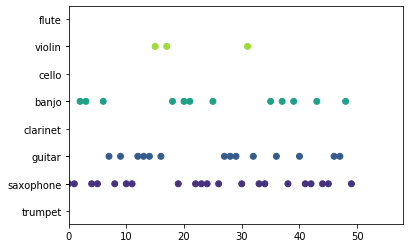

In [434]:
x = list(range(len(y)))
for i in range(len(instruments)):
    y.insert(0,i)
    x.insert(0,-1)
plt.yticks(y,instruments)
plt.xlim(left=0,right=len(y))
plt.scatter(x,y,c=y)
plt.show()

In [462]:
file_name = "/Users/syakka/Desktop/MixSongs/GVFCTG.mp3"
y = get_instrument_name_by_spliting(file_name)

0 th second cello
1 th second clarinet
2 th second guitar
3 th second guitar
4 th second guitar
5 th second trumpet
6 th second guitar
7 th second cello
8 th second violin
9 th second violin
10 th second trumpet
11 th second cello
12 th second cello
13 th second violin
14 th second guitar
15 th second guitar
16 th second guitar
17 th second guitar
18 th second cello
19 th second guitar
20 th second guitar
21 th second guitar
22 th second violin
23 th second violin
24 th second guitar
25 th second guitar
26 th second guitar
27 th second trumpet
28 th second violin
29 th second violin
30 th second violin
31 th second cello
32 th second violin
33 th second violin
34 th second violin
35 th second cello
36 th second cello
37 th second cello
38 th second cello
39 th second violin
40 th second saxophone
41 th second clarinet
42 th second violin
43 th second violin
44 th second cello
45 th second cello
46 th second cello
47 th second cello
48 th second cello
49 th second violin
50 th second tr

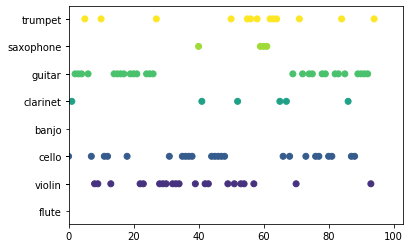

In [463]:
x = list(range(len(y)))
for i in range(len(instruments)):
    y.insert(0,i)
    x.insert(0,-1)
instruments.reverse()
plt.yticks(y,instruments)
instruments.reverse()
plt.xlim(left=0,right=len(y))
plt.scatter(x,y,c=y)
plt.show()

In [439]:
instruments_map

{'flute': 0,
 'violin': 1,
 'cello': 2,
 'banjo': 3,
 'clarinet': 4,
 'guitar': 5,
 'saxophone': 6,
 'trumpet': 7}

In [442]:
instruments

['flute',
 'violin',
 'cello',
 'banjo',
 'clarinet',
 'guitar',
 'saxophone',
 'trumpet']

In [ ]:
22